In [1]:
import xarray as xr
from pcv.map import SEMMap
import numpy as np

/home/anand/.conda/envs/pcv/lib/python3.10/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
model_num = 2
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}.nc")


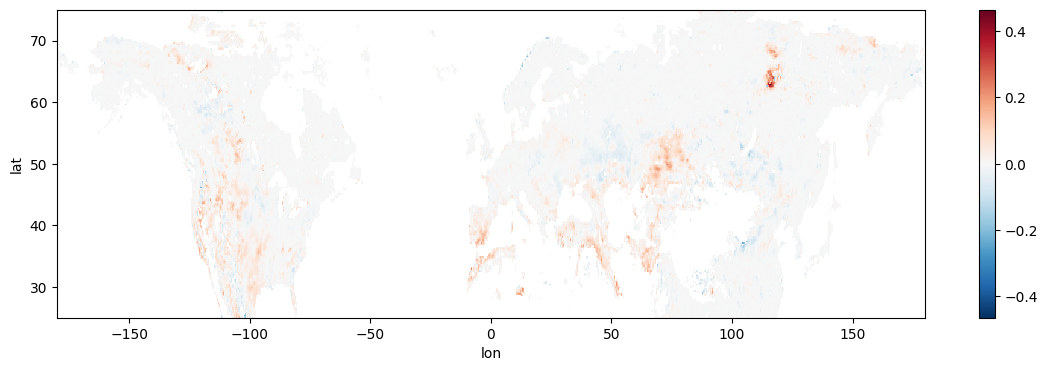

In [24]:
(   sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']
).plot(figsize = (14,4))

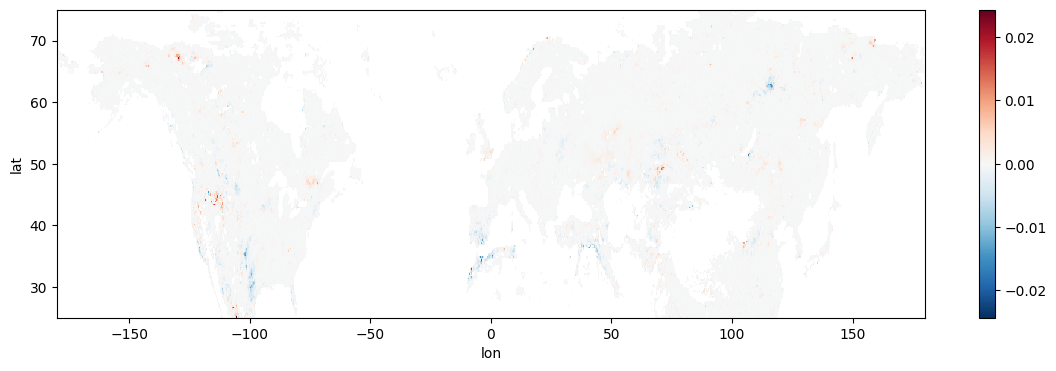

In [31]:
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate'] 


).plot(figsize = (14,4))

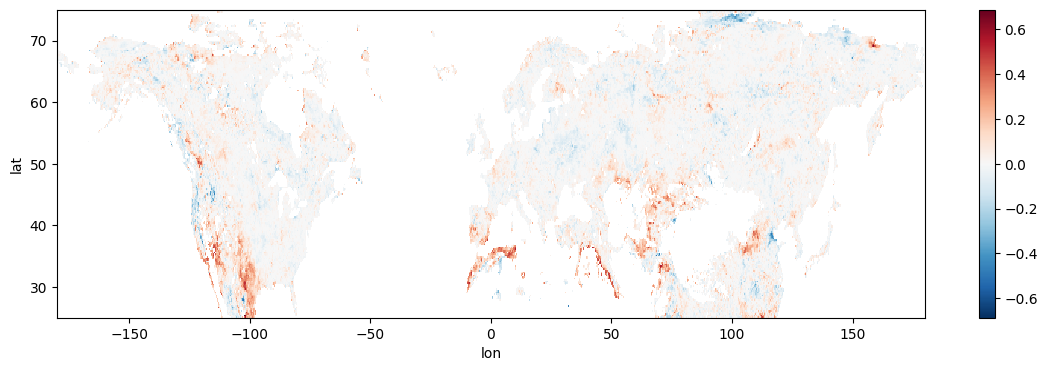

In [39]:
(
    sem_data['lai_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] 
    # sem_data['swvlall_spring~swvlall_winter_Estimate']

).plot(figsize = (14, 4))


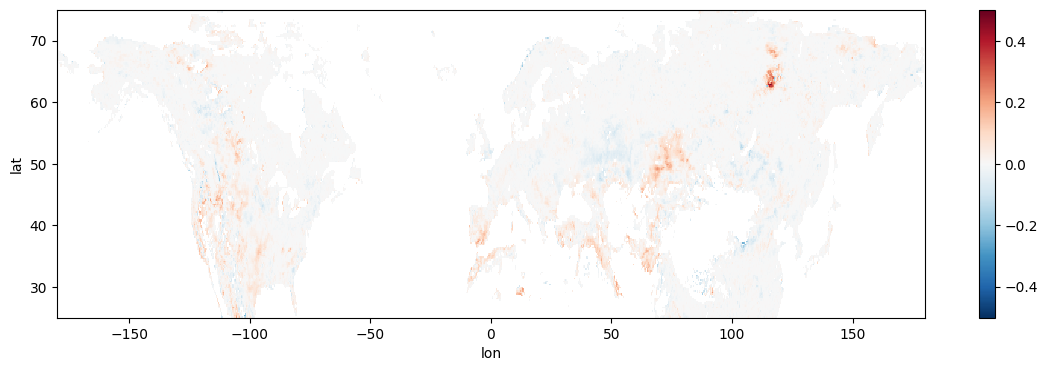

In [23]:
((
    sem_data['lai_summer~swvlall_summer_Estimate'] * 
    sem_data['swvlall_summer~swvlall_spring_Estimate'] *
    sem_data['swvlall_spring~swvlall_winter_Estimate'] *
    sem_data['swvlall_winter~tp_winter_Estimate']
) + 
(
    sem_data['lai_summer~swvlall_summer_Estimate'] *
    sem_data['swvlall_summer~lai_spring_Estimate'] *
    sem_data['lai_spring~swvlall_spring_Estimate'] 

)

).plot(figsize = (14,4))

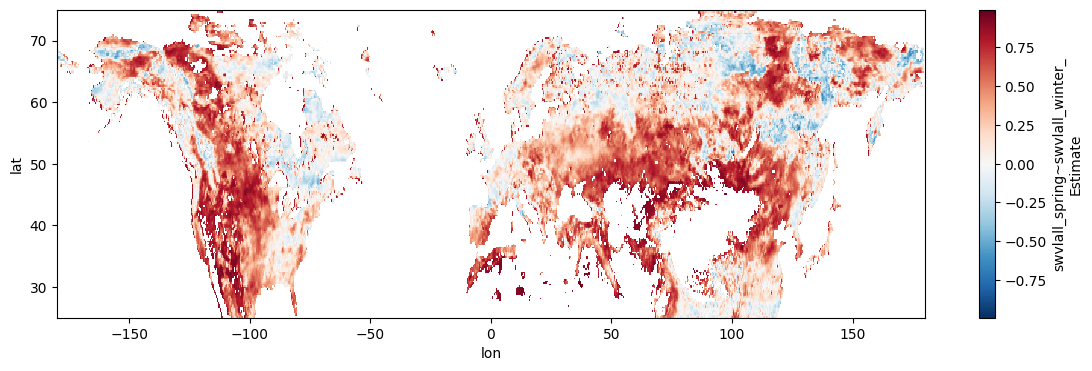

In [38]:
sem_data['swvlall_spring~swvlall_winter_Estimate'].plot(figsize = (14,4))

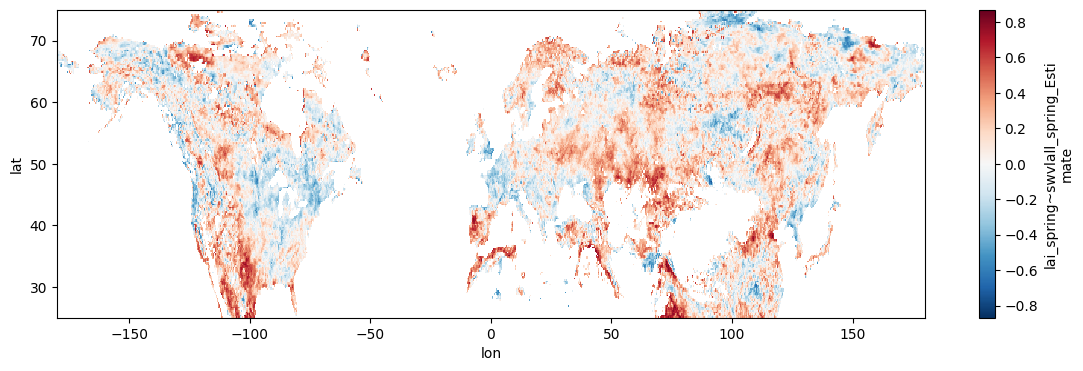

In [40]:
sem_data['lai_spring~swvlall_spring_Estimate'].plot(figsize = (14,4))


In [6]:
piping_1 = "t2m_winter |> lai_spring |> lai_summer"
piping_2 = "t2m_winter |> lai_summer"

In [7]:
sem_map = SEMMap(sem_data)
sem_map.path_map([piping_1, piping_2], "scratch.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/anand/.conda/envs/pcv/lib/python3.10/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


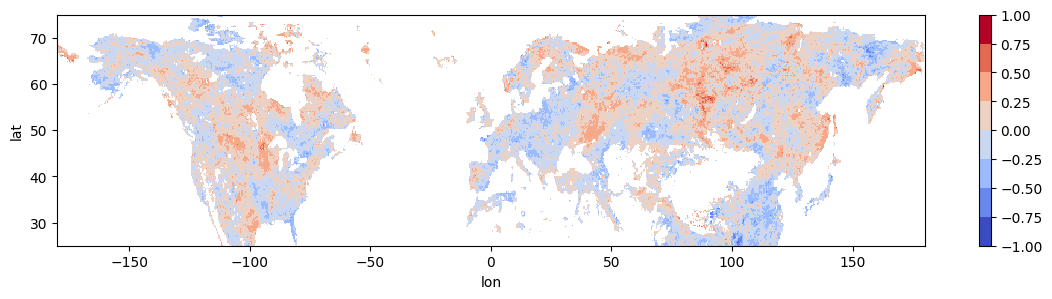

In [12]:
(sem_data['lai_summer~t2m_winter_Estimate'] + sem_data['lai_spring~t2m_winter_Estimate']*sem_data['lai_summer~lai_spring_Estimate']).plot(figsize = (14,3), vmin = -0.6, vmax = 0.6, cmap = "coolwarm",  levels = np.linspace(-1, 1, 9) )